## K-nearest-neighbor

### 必要なライブラリをインポート

In [83]:
#手書き文字のデータセット(mnist)をインポート
from keras.datasets import mnist
import numpy as np
#データプロットのライブラリをインポート
import matplotlib.pyplot as plt
from collections import Counter

###  教師データとテストデータの取得

In [84]:
#テストデータと教師データのデータとindexを取得
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

### K-nearest-neighborの実装 

### 方針
1,選択したテストデータと教師データ全ての距離を測定

2,測定して距離を近い順に並び替える

3,距離が近いものを上位k個選択し、多数決を行い、テストデータの数字を当てる

1


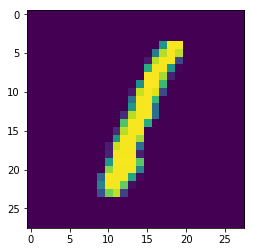

In [92]:
#kの値を入力
K=3
#呼び出すテストデータの番号をランダムに指定
i=np.random.randint(10000)
#x_trainの配列を(28,28)から(1,756)に変換
data = X_test[i].reshape(1,-1)

#X_trainを(60000,756)に変換
X_train2 = X_train.reshape(X_train.shape[0],-1)

#全てのデータに対して距離を計算する
#distance = np.sum(np.sqrt(np.square(X_train2-data)),axis=1)
distance = np.linalg.norm(X_train2-data,axis=1)

#距離が近い順に配列を並び替える
sorted_label = y_train[np.argsort(distance)]

#距離が近い順にk個調べ多数決をとり、数字を決定する
pred_y = Counter(sorted_label[:K]).most_common()[0][0]

print(pred_y)


#-------------
#元データの可視化
plt.imshow(data.reshape(28,28))
plt.show()

### 補足

In [93]:
X_test.shape

(10000, 28, 28, 1)

In [90]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [96]:
X_train.shape

(60000, 28, 28, 1)

In [89]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [87]:
data.shape

(1, 784)

In [63]:
X_train2.shape

(60000, 784)

In [51]:
(X_train2-data).shape

(60000, 784)

In [97]:
distance.shape

(60000,)

In [98]:
np.sort(distance)

array([ 1.6931779,  2.1075723,  2.14956  , ..., 15.092302 , 15.206288 ,
       15.522598 ], dtype=float32)

In [99]:
#argsortは値が小さい順に、indexを返す
np.argsort(distance)

array([36997, 53301, 55175, ..., 13650, 41358, 25285])

In [22]:
y_train[np.argsort(distance)]

array([3, 3, 3, ..., 0, 0, 0], dtype=uint8)

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [25]:
Counter(sorted_label[:100]).most_common()[0][0]

3